In [50]:
#  https://www.jianshu.com/p/5db596333dfb

In [1]:
setwd('/import/hd/sc')

In [2]:
library(nichenetr)
library(Seurat) # please update to Seurat V4
library(tidyverse)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
Warning message:
"package 'Seurat' was built under R version 4.2.3"
Attaching SeuratObject

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.

In [3]:
library(dplyr)

In [4]:
seuratObj <- readRDS('/import/hd/SCE.rds')
seuratObj@meta.data %>% head()
seuratObj@meta.data$celltype %>% table() 

,orig.ident,nCount_Spatial,nFeature_Spatial,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters,SCT_snn_res.0.5,slice,region,integrated_snn_res.0.6
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<fct>,<chr>,<dbl>,<chr>,<fct>
AACACTTGGCAAGGAA-1_1,OA7,15411,5859,0.908442,12119,5825,1,7,3,NA,NA,7
AACAGGAAGAGCATAG-1_1,OA7,17533,7147,1.962014,12284,6887,2,6,2,NA,NA,6
AACAGTCAGGCTCCGC-1_1,OA7,3266,1994,3.459890,9319,2821,10,1,4,NA,NA,1
AACAGTCCACGCGGTG-1_1,OA7,21735,6960,1.702323,11882,5749,10,1,4,NA,NA,1
AACATACTCATATGCG-1_1,OA7,18866,7427,2.544260,12373,6946,2,6,2,NA,NA,6
AACATAGTCTATCTAC-1_1,OA7,24360,8134,1.457307,12028,6259,13,11,10,NA,NA,11


< table of extent 0 >

In [5]:
organism = "human"
lr_network = readRDS("/import/DB/nichenetr/lr_network_human_21122021.rds")

In [6]:
ligand_target_matrix=readRDS("/import/DB/nichenetr/ligand_target_matrix_nsga2r_final.rds")
weighted_networks = readRDS("/import/DB/nichenetr/weighted_networks_nsga2r_final.rds")
ligand_target_matrix <- readRDS("/import/DB/nichenetr/ligand_target_matrix_nsga2r_final.rds")
ligand_target_matrix[1:5,1:5] # target genes in rows, ligands in columns

,A2M,AANAT,ABCA1,ACE,ACE2
A-GAMMA3'E,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000
A1BG,0.0018503922,0.0011108718,0.0014225077,0.0028594037,0.001139013
A1BG-AS1,0.0007400797,0.0004677614,0.0005193137,0.0007836698,0.000375007
A1CF,0.0024799266,0.0013026348,0.0020420890,0.0047921048,0.003273375
A2M,0.0084693452,0.0040689323,0.0064256379,0.0105191365,0.005719199


In [7]:
lr_network <- readRDS('/import/DB/nichenetr/lr_network_human_21122021.rds')
lr_network = lr_network %>% distinct(from, to)
head(lr_network)

from,to
<chr>,<chr>
A2M,MMP2
A2M,MMP9
A2M,LRP1
A2M,KLK3
AANAT,MTNR1A
AANAT,MTNR1B


In [8]:
weighted_networks <- readRDS('/import/DB/nichenetr/weighted_networks_nsga2r_final.rds')
weighted_networks_lr = weighted_networks$lr_sig %>% inner_join(lr_network, by = c("from","to"))
head(weighted_networks$lr_sig)

from,to,weight
<chr>,<chr>,<dbl>
A-GAMMA3'E,ACTG1P11,0.10018411
A-GAMMA3'E,AXIN2,0.08687722
A-GAMMA3'E,BUB1B-PAK6,0.09322200
A-GAMMA3'E,CEACAM7,0.07927829
A-GAMMA3'E,CHRNA1,0.09010287
A-GAMMA3'E,DTX2P1,0.09758541


In [9]:
head(weighted_networks$gr) 

from,to,weight
<chr>,<chr>,<dbl>
A1BG,A2M,0.16500026
AAAS,GFAP,0.09064868
AADAC,CTAG1B,0.10358772
AADAC,CYP3A4,0.17727654
AADAC,DIRAS3,0.09359021
AADAC,IRF8,0.08918009


In [10]:
table(seuratObj$seurat_clusters)


  0   1   2   3   4   5   6   7   8   9  10  11 
741 740 555 515 350 338 325 320 130 122  97  57 

In [11]:
table(seuratObj$orig.ident)


  N2  OA7 
1308 2982 

In [12]:
library(Seurat)

In [13]:
Idents(seuratObj) = 'orig.ident'

In [14]:
table(seuratObj$orig.ident)


  N2  OA7 
1308 2982 

In [15]:
Idents(seuratObj) = 'orig.ident'

In [16]:
seuratObj = subset(seuratObj,idents = 'OA7')

In [17]:
seuratObj@meta.data$celltype_aggregate = paste(seuratObj@meta.data$seurat_clusters, seuratObj@meta.data$orig.ident,sep = "_") # user adaptation required on own dataset
#DimPlot(seuratObj, group.by = "celltype_aggregate")

In [18]:
table(seuratObj$celltype_aggregate)


 0_OA7 10_OA7 11_OA7  1_OA7  2_OA7  3_OA7  4_OA7  5_OA7  6_OA7  7_OA7  8_OA7 
   447     43     57    533    387    333    132    284    254    275    125 
 9_OA7 
   112 

In [19]:
condition_oi = '7_OA7'
#condition_ref = c('Inflamm.Macro_OA','Resid.Macro_OA','macro1_OA','macro2_OA','macro3_OA','macro4_OA')

In [20]:
library(tibble)

In [21]:
DE_table_receiver <-  FindMarkers(object = seuratObj,
                                  ident.1 = condition_oi, #ident.2 = condition_ref,
                                  group.by = "celltype_aggregate",
                                  min.pct = 0.05) %>% rownames_to_column("gene")

geneset_oi <- DE_table_receiver %>% filter(p_val_adj <= 0.05 & abs(avg_log2FC) >= 0) %>% pull(gene)
geneset_oi <- geneset_oi %>% .[. %in% rownames(ligand_target_matrix)]

In [22]:
Idents(seuratObj) = 'celltype_aggregate'

In [23]:
receiver = "3_OA7"
expressed_genes_receiver <- get_expressed_genes(receiver, seuratObj, pct = 0.05)

In [24]:
background_expressed_genes <- expressed_genes_receiver %>% .[. %in% rownames(ligand_target_matrix)]
length(background_expressed_genes)

[1] 1732

In [25]:
all_receptors <- unique(lr_network$to)  
expressed_receptors <- intersect(all_receptors, expressed_genes_receiver)
potential_ligands <- lr_network %>% filter(to %in% expressed_receptors) %>% pull(from) %>% unique()

In [26]:
ligand_activities <- predict_ligand_activities(geneset = geneset_oi,
                                               background_expressed_genes = background_expressed_genes,
                                               ligand_target_matrix = ligand_target_matrix,
                                               potential_ligands = potential_ligands)

ligand_activities <- ligand_activities %>% arrange(-aupr_corrected) %>% mutate(rank = rank(desc(aupr_corrected)))
ligand_activities

test_ligand,auroc,aupr,aupr_corrected,pearson,rank
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LPA,0.6408808,0.2612750,0.12171331,0.1670814,1
C5,0.6266202,0.2510731,0.11151142,0.1370971,2
APOC3,0.6367708,0.2499531,0.11039137,0.1510279,3
CCL15,0.6351422,0.2470879,0.10752615,0.1242730,4
APOA2,0.6311263,0.2469144,0.10735269,0.1899650,5
GHRL,0.6254016,0.2466452,0.10708353,0.1722366,6
CD1D,0.6280853,0.2453867,0.10582501,0.1898314,7
CSF2,0.6300960,0.2438222,0.10426054,0.1999428,8
SPP1,0.6098863,0.2436869,0.10412517,0.1639075,9


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


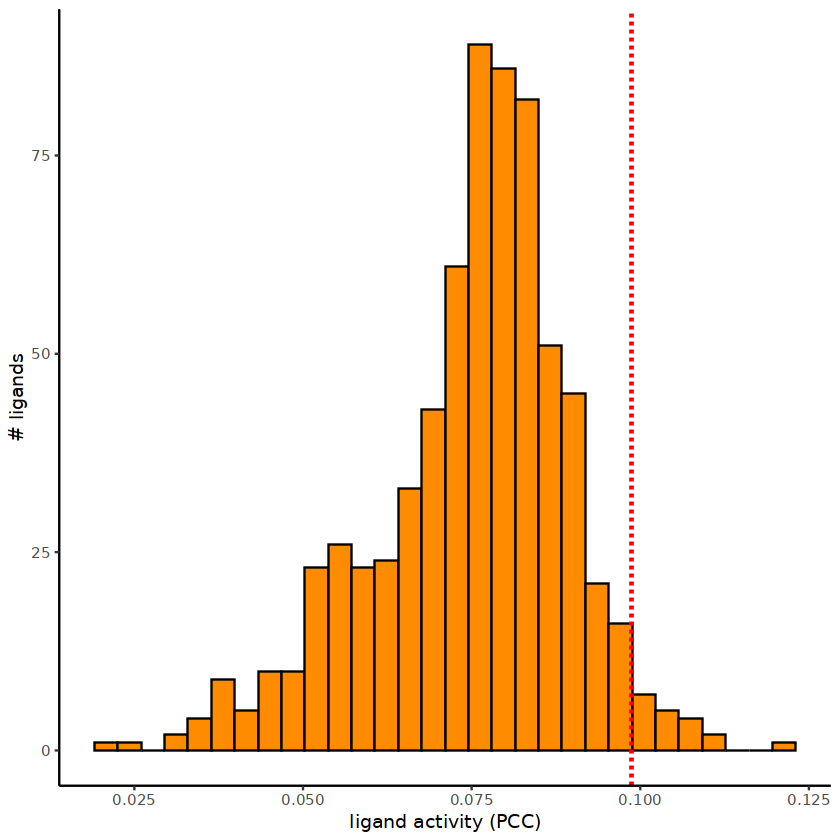

In [27]:
p_hist_lig_activity <- ggplot(ligand_activities, aes(x=aupr_corrected)) + 
  geom_histogram(color="black", fill="darkorange")  + 
  geom_vline(aes(xintercept=min(ligand_activities %>% top_n(20, aupr_corrected) %>% pull(aupr_corrected))),
             color="red", linetype="dashed", size=1) + 
  labs(x="ligand activity (PCC)", y = "# ligands") +
  theme_classic()

p_hist_lig_activity

In [28]:
best_upstream_ligands <- ligand_activities %>% top_n(30, aupr_corrected) %>% arrange(-aupr_corrected) %>% pull(test_ligand)

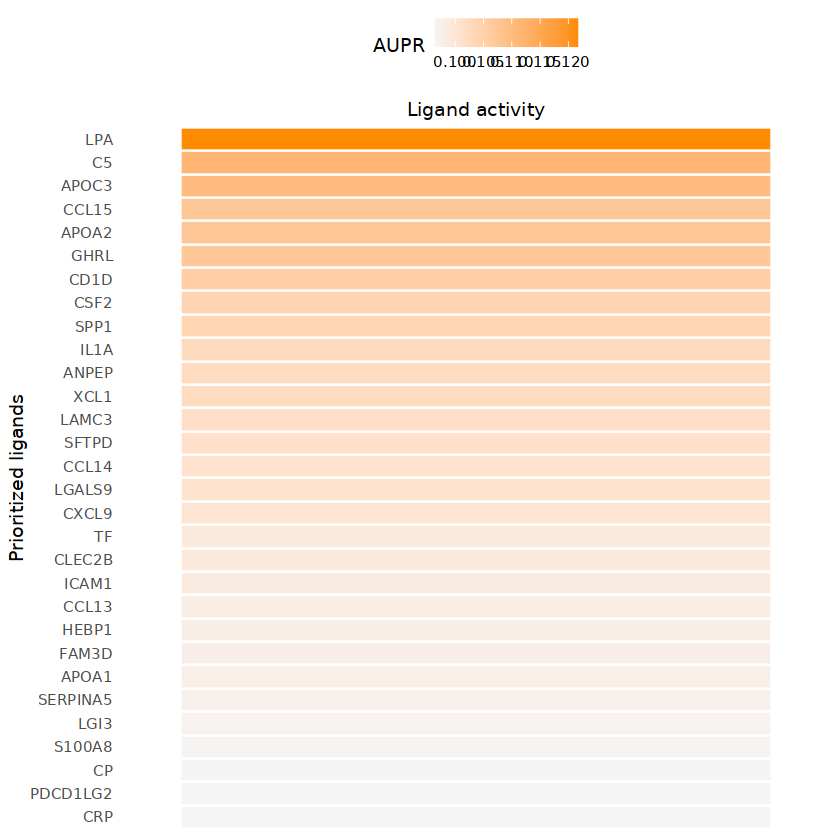

In [29]:
vis_ligand_aupr <- ligand_activities %>% filter(test_ligand %in% best_upstream_ligands) %>%
  column_to_rownames("test_ligand") %>% select(aupr_corrected) %>% arrange(aupr_corrected) %>% as.matrix(ncol = 1)

(make_heatmap_ggplot(vis_ligand_aupr,
                     "Prioritized ligands", "Ligand activity", 
                     legend_title = "AUPR", color = "darkorange") + 
    theme(axis.text.x.top = element_blank()))  

In [30]:
active_ligand_target_links_df <- best_upstream_ligands %>%
  lapply(get_weighted_ligand_target_links,
         geneset = geneset_oi,
         ligand_target_matrix = ligand_target_matrix,
         n = 100) %>%
  bind_rows() %>% drop_na()

In [31]:
nrow(active_ligand_target_links_df)

[1] 548

In [32]:
head(active_ligand_target_links_df)

ligand,target,weight
<chr>,<chr>,<dbl>
LPA,ATF3,0.01317021
LPA,CCL18,0.06759717
LPA,CEBPB,0.01143507
LPA,CXCL8,0.07075363
LPA,CXCR4,0.01310435
LPA,FOS,0.07549270


In [33]:
active_ligand_target_links <- prepare_ligand_target_visualization(
  ligand_target_df = active_ligand_target_links_df,
  ligand_target_matrix = ligand_target_matrix,
  cutoff = 0.33) 

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


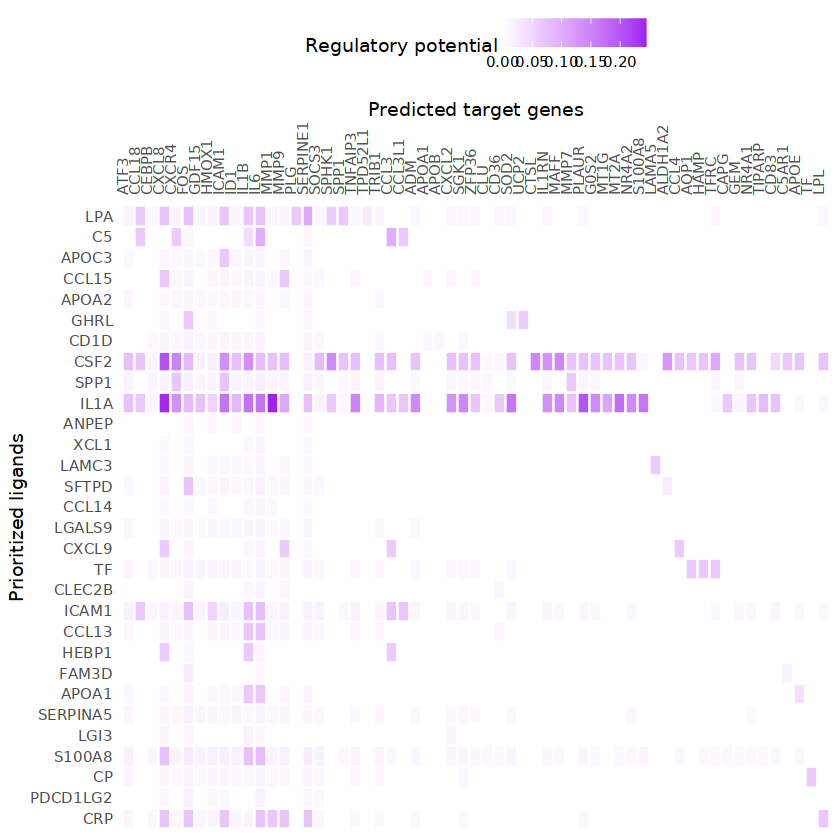

In [34]:
order_ligands <- intersect(best_upstream_ligands, colnames(active_ligand_target_links)) %>% rev()
order_targets <- active_ligand_target_links_df$target %>% unique() %>% intersect(rownames(active_ligand_target_links))

vis_ligand_target <- t(active_ligand_target_links[order_targets,order_ligands])

make_heatmap_ggplot(vis_ligand_target, "Prioritized ligands", "Predicted target genes",
                    color = "purple", legend_title = "Regulatory potential") +
  scale_fill_gradient2(low = "whitesmoke",  high = "purple")

In [35]:
ligand_receptor_links_df <- get_weighted_ligand_receptor_links(
  best_upstream_ligands, expressed_receptors,
  lr_network, weighted_networks$lr_sig) 

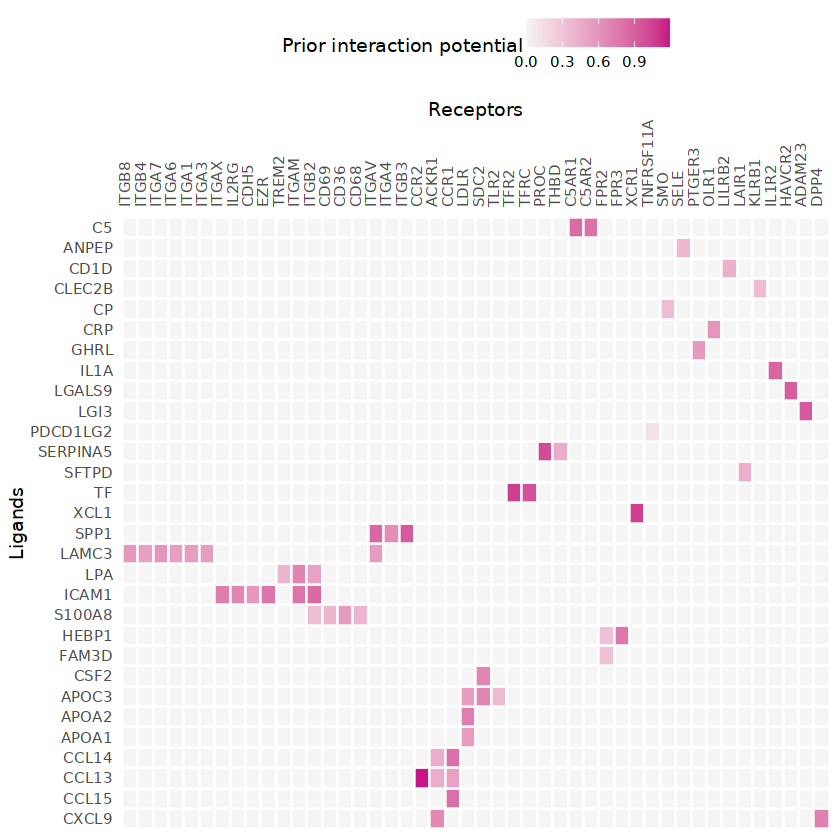

In [36]:
vis_ligand_receptor_network <- prepare_ligand_receptor_visualization(
  ligand_receptor_links_df,
  best_upstream_ligands,
  order_hclust = "both") 

(make_heatmap_ggplot(t(vis_ligand_receptor_network), 
                     y_name = "Ligands", x_name = "Receptors",  
                     color = "mediumvioletred", legend_title = "Prior interaction potential"))

### 以sender爲中心

In [39]:
sender_celltypes <- c("7_OA7")

# Use lapply to get the expressed genes of every sender cell type separately here
list_expressed_genes_sender <- sender_celltypes %>% unique() %>% lapply(get_expressed_genes, seuratObj, 0.05)
expressed_genes_sender <- list_expressed_genes_sender %>% unlist() %>% unique()

potential_ligands_focused <- intersect(potential_ligands, expressed_genes_sender) 

In [40]:
ligand_activities_all <- ligand_activities 
best_upstream_ligands_all <- best_upstream_ligands

ligand_activities <- ligand_activities %>% filter(test_ligand %in% potential_ligands_focused)
best_upstream_ligands <- ligand_activities %>% top_n(30, aupr_corrected) %>% arrange(-aupr_corrected) %>%
  pull(test_ligand) %>% unique()

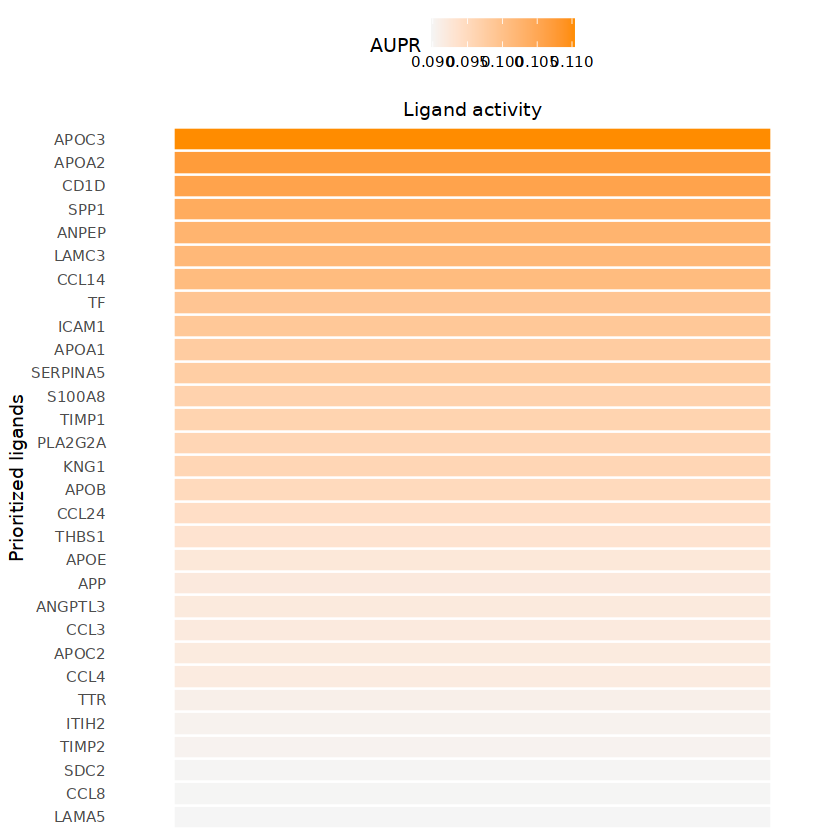

In [41]:
ligand_aupr_matrix <- ligand_activities %>% filter(test_ligand %in% best_upstream_ligands) %>%
  column_to_rownames("test_ligand") %>% select(aupr_corrected) %>% arrange(aupr_corrected)
vis_ligand_aupr <- as.matrix(ligand_aupr_matrix, ncol = 1) 

p_ligand_aupr <- make_heatmap_ggplot(vis_ligand_aupr,
                     "Prioritized ligands", "Ligand activity", 
                     legend_title = "AUPR", color = "darkorange") + 
    theme(axis.text.x.top = element_blank())

p_ligand_aupr

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


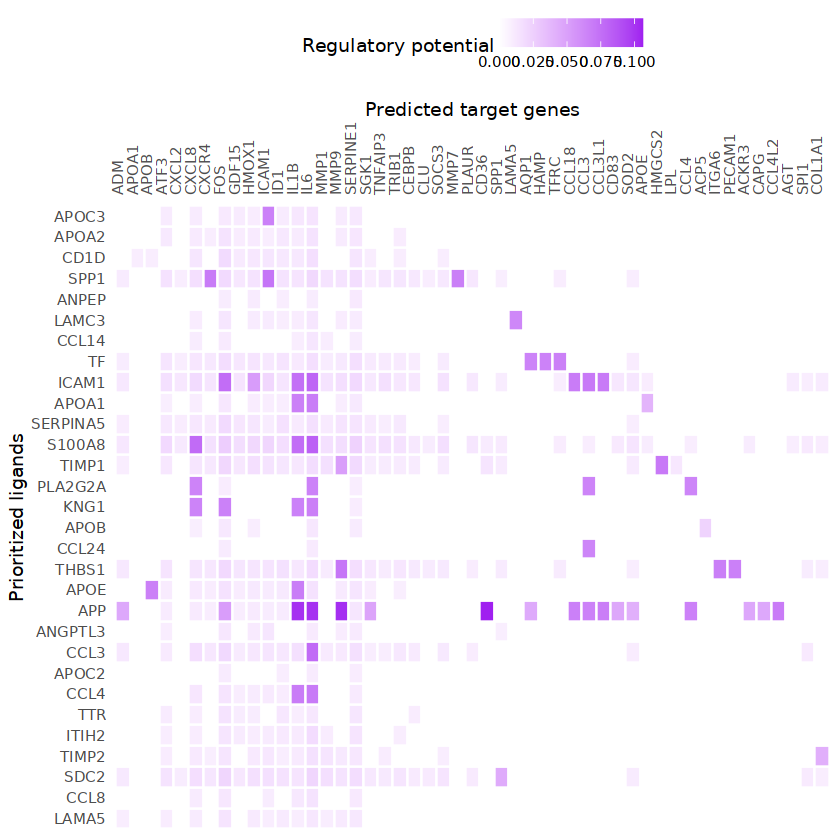

In [42]:
# Target gene plot
active_ligand_target_links_df <- best_upstream_ligands %>%
  lapply(get_weighted_ligand_target_links,
         geneset = geneset_oi,
         ligand_target_matrix = ligand_target_matrix,
         n = 100) %>%
  bind_rows() %>% drop_na()

active_ligand_target_links <- prepare_ligand_target_visualization(
  ligand_target_df = active_ligand_target_links_df,
  ligand_target_matrix = ligand_target_matrix,
  cutoff = 0.33) 

order_ligands <- intersect(best_upstream_ligands, colnames(active_ligand_target_links)) %>% rev()
order_targets <- active_ligand_target_links_df$target %>% unique() %>% intersect(rownames(active_ligand_target_links))

vis_ligand_target <- t(active_ligand_target_links[order_targets,order_ligands])

p_ligand_target <- make_heatmap_ggplot(vis_ligand_target, "Prioritized ligands", "Predicted target genes",
                    color = "purple", legend_title = "Regulatory potential") +
  scale_fill_gradient2(low = "whitesmoke",  high = "purple")

p_ligand_target

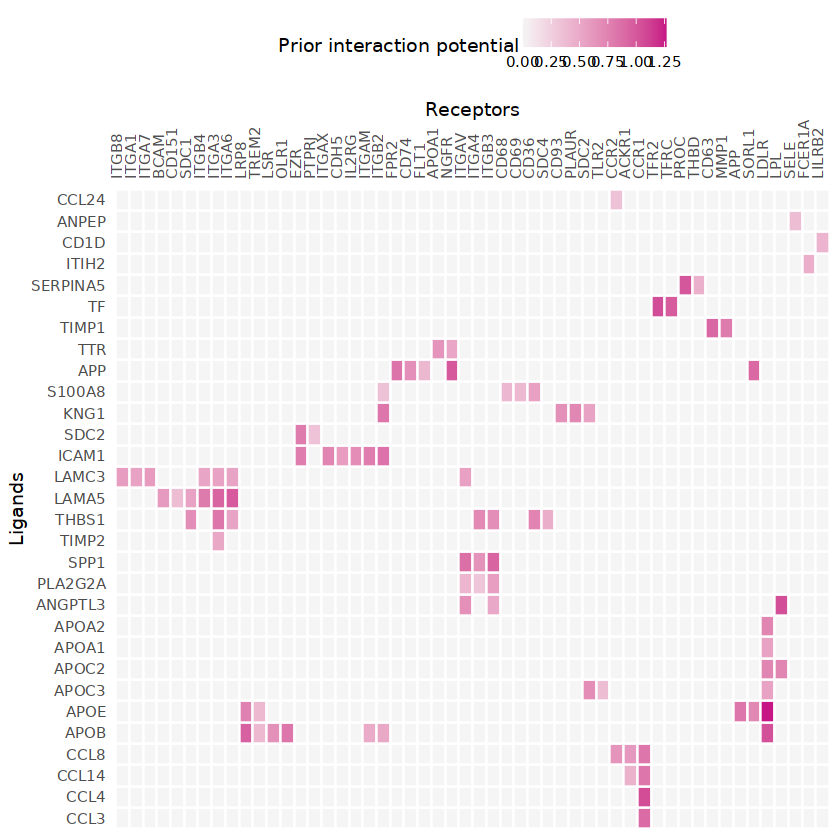

In [43]:
# Receptor plot
ligand_receptor_links_df <- get_weighted_ligand_receptor_links(
  best_upstream_ligands, expressed_receptors,
  lr_network, weighted_networks$lr_sig) 

vis_ligand_receptor_network <- prepare_ligand_receptor_visualization(
  ligand_receptor_links_df,
  best_upstream_ligands,
  order_hclust = "both") 

p_ligand_receptor <- make_heatmap_ggplot(t(vis_ligand_receptor_network), 
                     y_name = "Ligands", x_name = "Receptors",  
                     color = "mediumvioletred", legend_title = "Prior interaction potential")

p_ligand_receptor

In [48]:
seuratObj$cell1 = ifelse(seuratObj$celltype_aggregate == '7_OA7','SPP1_macro','Others')

In [57]:
table(seuratObj$cell1)


    Others SPP1_macro 
      2707        275 

In [55]:
sender_celltypes = c('SPP1_macro','Others')

In [58]:
Idents(seuratObj) = 'cell1'

Warning message:
"Scaling data with a low number of groups may produce misleading results"


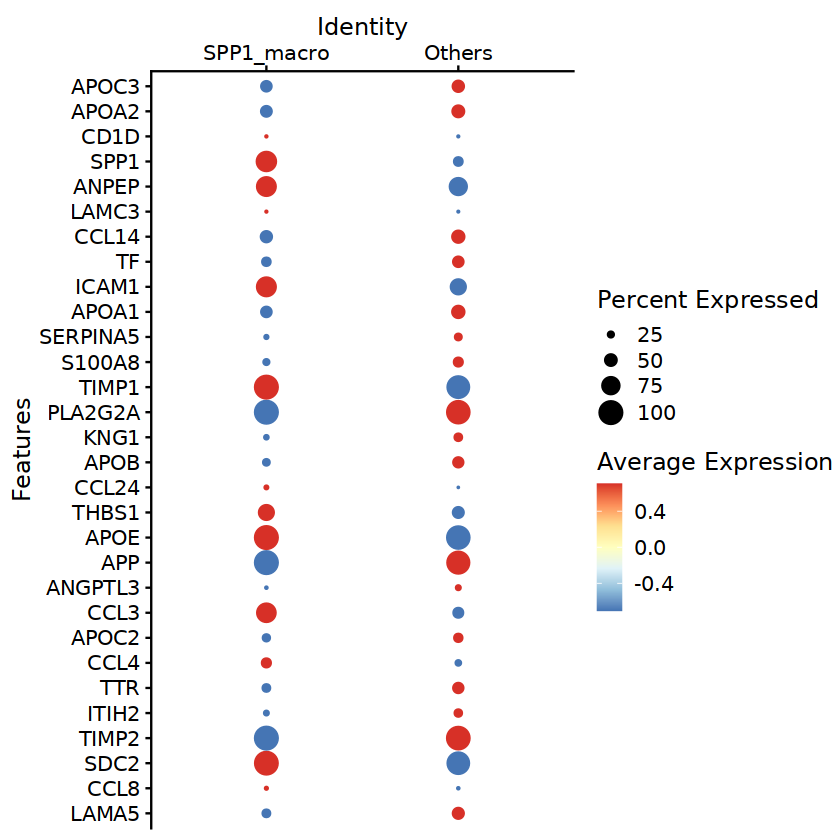

In [59]:
# Dotplot of sender-focused approach
p_dotplot <- DotPlot(subset(seuratObj, cell1  %in% sender_celltypes),
        features = rev(best_upstream_ligands), cols = "RdYlBu") + 
  coord_flip() +
  scale_y_discrete(position = "right")

p_dotplot

In [63]:
celltype_order <- levels(Idents(seuratObj)) 

In [64]:
celltype_order

[1] "SPP1_macro" "Others"

In [74]:
options(repr.plot.width = 12,repr.plot.height = 10)

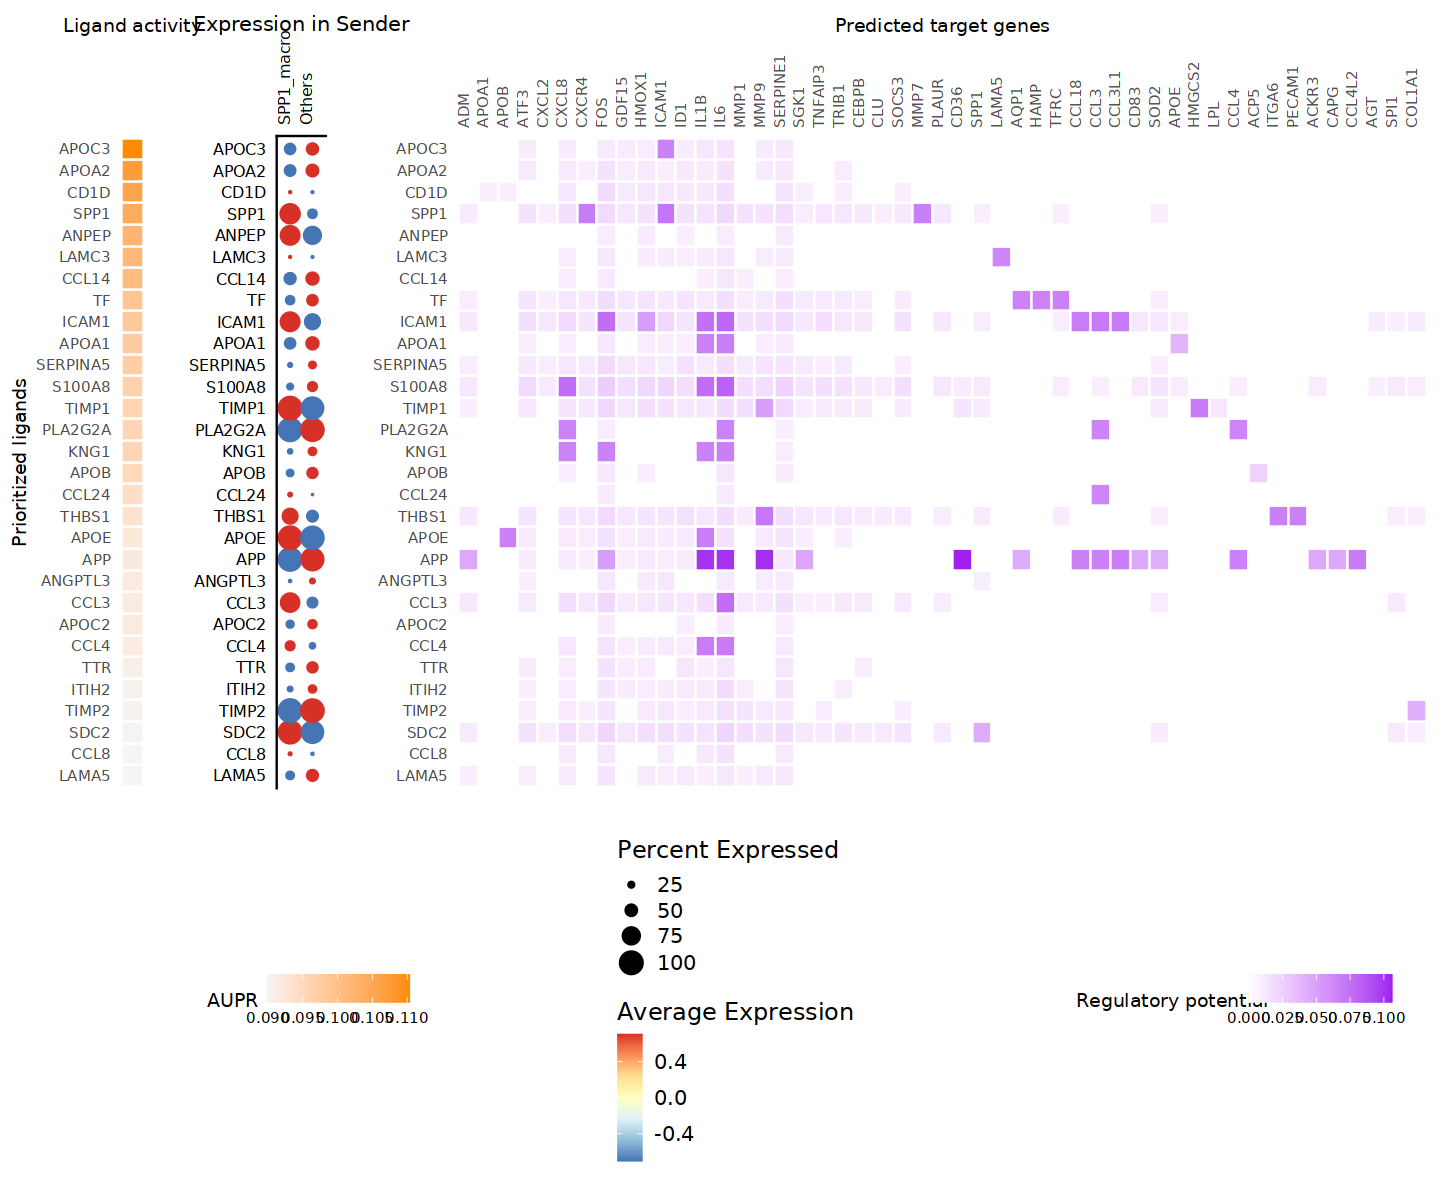

In [75]:
figures_without_legend <- cowplot::plot_grid(
  p_ligand_aupr + theme(legend.position = "none"),
  p_dotplot + theme(legend.position = "none",
                    axis.ticks = element_blank(),
                    axis.title.y = element_blank(),
                    axis.title.x = element_text(size = 12),
                    axis.text.y = element_text(size = 9),
                    axis.text.x = element_text(size = 9,  angle = 90, hjust = 0)) +
    ylab("Expression in Sender"),
  # p_lfc + theme(legend.position = "none",
  #               axis.title.y = element_blank()),
  p_ligand_target + theme(legend.position = "none",
                          axis.title.y = element_blank()),
  align = "hv",
  nrow = 1,
  rel_widths = c(ncol(vis_ligand_aupr)+6, +8, ncol(vis_ligand_target)))  #ncol(vis_ligand_lfc)+7, ncol(vis_ligand_lfc)

legends <- cowplot::plot_grid(
    ggpubr::as_ggplot(ggpubr::get_legend(p_ligand_aupr)),
    ggpubr::as_ggplot(ggpubr::get_legend(p_dotplot)),
    #ggpubr::as_ggplot(ggpubr::get_legend(p_lfc)),
    ggpubr::as_ggplot(ggpubr::get_legend(p_ligand_target)),
    nrow = 1,
    align = "h", rel_widths = c(1.5, 1, 1, 1))

combined_plot <-  cowplot::plot_grid(figures_without_legend, legends, rel_heights = c(10,5), nrow = 2, align = "hv")
combined_plot

In [14]:
Idents(seuratObj) <- 'celltype'
receiver = "Inflamm.Macro"
expressed_genes_receiver = get_expressed_genes(receiver, seuratObj, pct = 0.10)
background_expressed_genes = expressed_genes_receiver %>% .[. %in% rownames(ligand_target_matrix)]
## sender
sender_celltypes = c("SPP1_macro")
list_expressed_genes_sender = sender_celltypes %>% unique() %>% lapply(get_expressed_genes, seuratObj, 0.10) # lapply to get the expressed genes of every sender cell type separately here
expressed_genes_sender = list_expressed_genes_sender %>% unlist() %>% unique()

### https://lishensuo.github.io/posts/bioinfo/029%E5%8D%95%E7%BB%86%E8%83%9E%E5%88%86%E6%9E%90%E5%B7%A5%E5%85%B7--nichenet%E7%BB%86%E8%83%9E%E9%80%9A%E8%AE%AF%E5%88%86%E6%9E%90/

In [15]:
table(seuratObj$group)


Healthy      OA 
  33154   28696 

In [44]:
nichenet_output =  nichenet_seuratobj_aggregate(
  seurat_obj = seuratObj, # Seurat对象，其active.ident需设置为细胞类型
  expression_pct = 0.10,  # 界定细胞类型是否表达配/受体的比例阈值，默认为0.1
  #organism = "human", # 交代物种信息，默认为人类 c("human","mouse")
  #Group
  condition_colname = "group",   # 交代分组的meta名
  condition_oi = "OA", condition_reference = "Healthy", # 交代实验组与对照组名 
  # receiver
  receiver = "Inflamm.Macro",  # 交代receiver细胞类型
  geneset = "up", # 判断特定基因集的方法，默认使用全部差异基因(oi/ref)c("DE","up","down")
  lfc_cutoff = 0.25, # 判断差异基因的阈值
  # sender
  sender = c("SPP1_macro"), #设置可能的sender cell 
  top_n_targets = 200,  #每个ligand最多考虑200个target gene
  top_n_ligands = 20,   #给出最有可能的20个上游ligand
  cutoff_visualization = 0.33,  #设置可视化ligand-target scores的阈值
  # refer data
  ligand_target_matrix = ligand_target_matrix, 
  lr_network = lr_network, 
  weighted_networks = weighted_networks, 
  )


[1] "Read in and process NicheNet's networks"
[1] "Define expressed ligands and receptors in receiver and sender cells"
[1] "Perform DE analysis in receiver cell"
[1] "Perform NicheNet ligand activity analysis"
[1] "Infer active target genes of the prioritized ligands"
[1] "Infer receptors of the prioritized ligands"
[1] "Perform DE analysis in sender cells"


Warning message:
"Only one identity present, the expression values will be not scaled"


In [45]:
nichenet_output %>% names()

[1] "ligand_activities"                     
 [2] "top_ligands"                           
 [3] "top_targets"                           
 [4] "top_receptors"                         
 [5] "ligand_target_matrix"                  
 [6] "ligand_target_heatmap"                 
 [7] "ligand_target_df"                      
 [8] "ligand_expression_dotplot"             
 [9] "ligand_differential_expression_heatmap"
[10] "ligand_activity_target_heatmap"        
[11] "ligand_receptor_matrix"                
[12] "ligand_receptor_heatmap"               
[13] "ligand_receptor_df"                    
[14] "geneset_oi"                            
[15] "background_expressed_genes"

In [46]:
nichenet_output$top_ligands

[1] "CSF1"    "COPA"    "CCN2"    "CD52"    "ITGB2"   "TGM2"    "LRPAP1" 
 [8] "IL1RN"   "ANXA1"   "MICB"    "ANXA2"   "COL1A1"  "CD59"    "PLTP"   
[15] "PLA2G2A" "IL10"    "HMGB1"   "SIRPA"   "HBEGF"   "ADAM17"

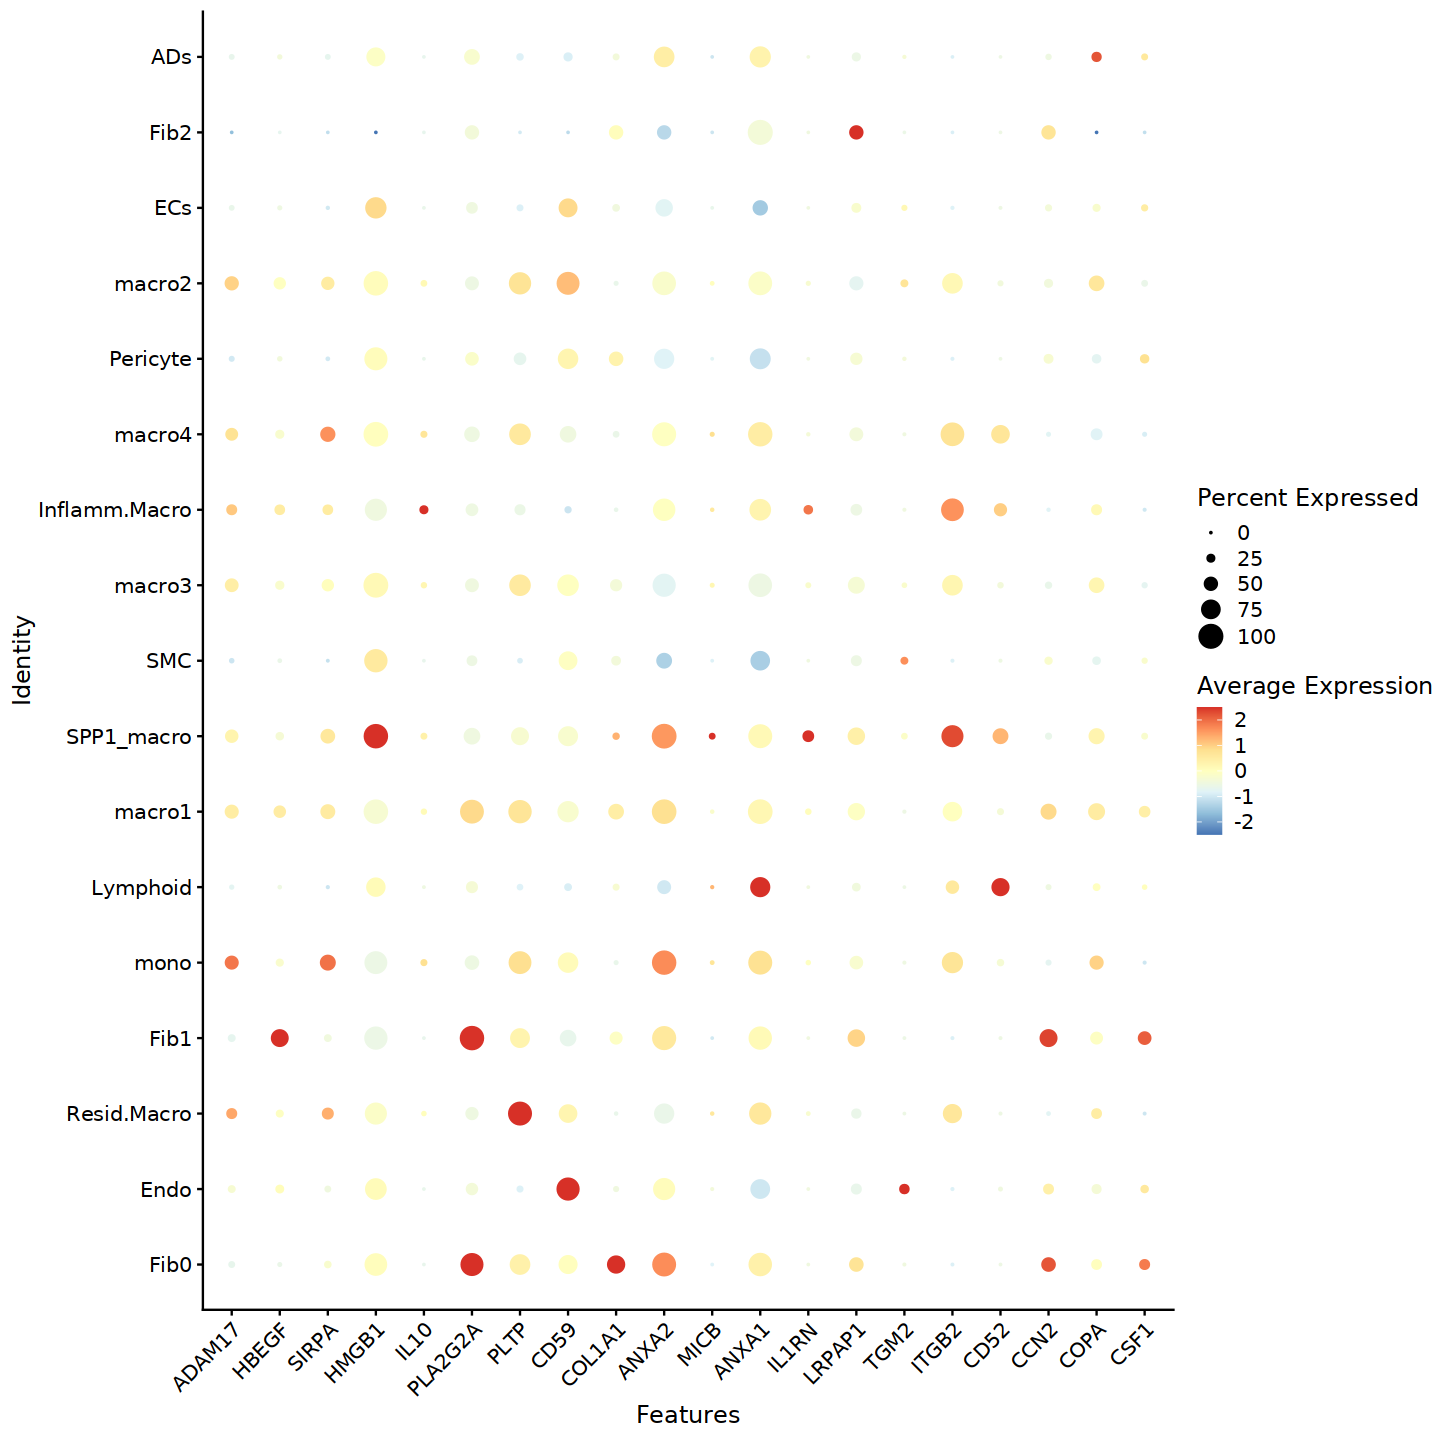

In [47]:
DotPlot(seuratObj, features = nichenet_output$top_ligands %>% rev(), cols = "RdYlBu") + RotatedAxis()

In [48]:
options(repr.plot.width =9,repr.plot.height = 14)

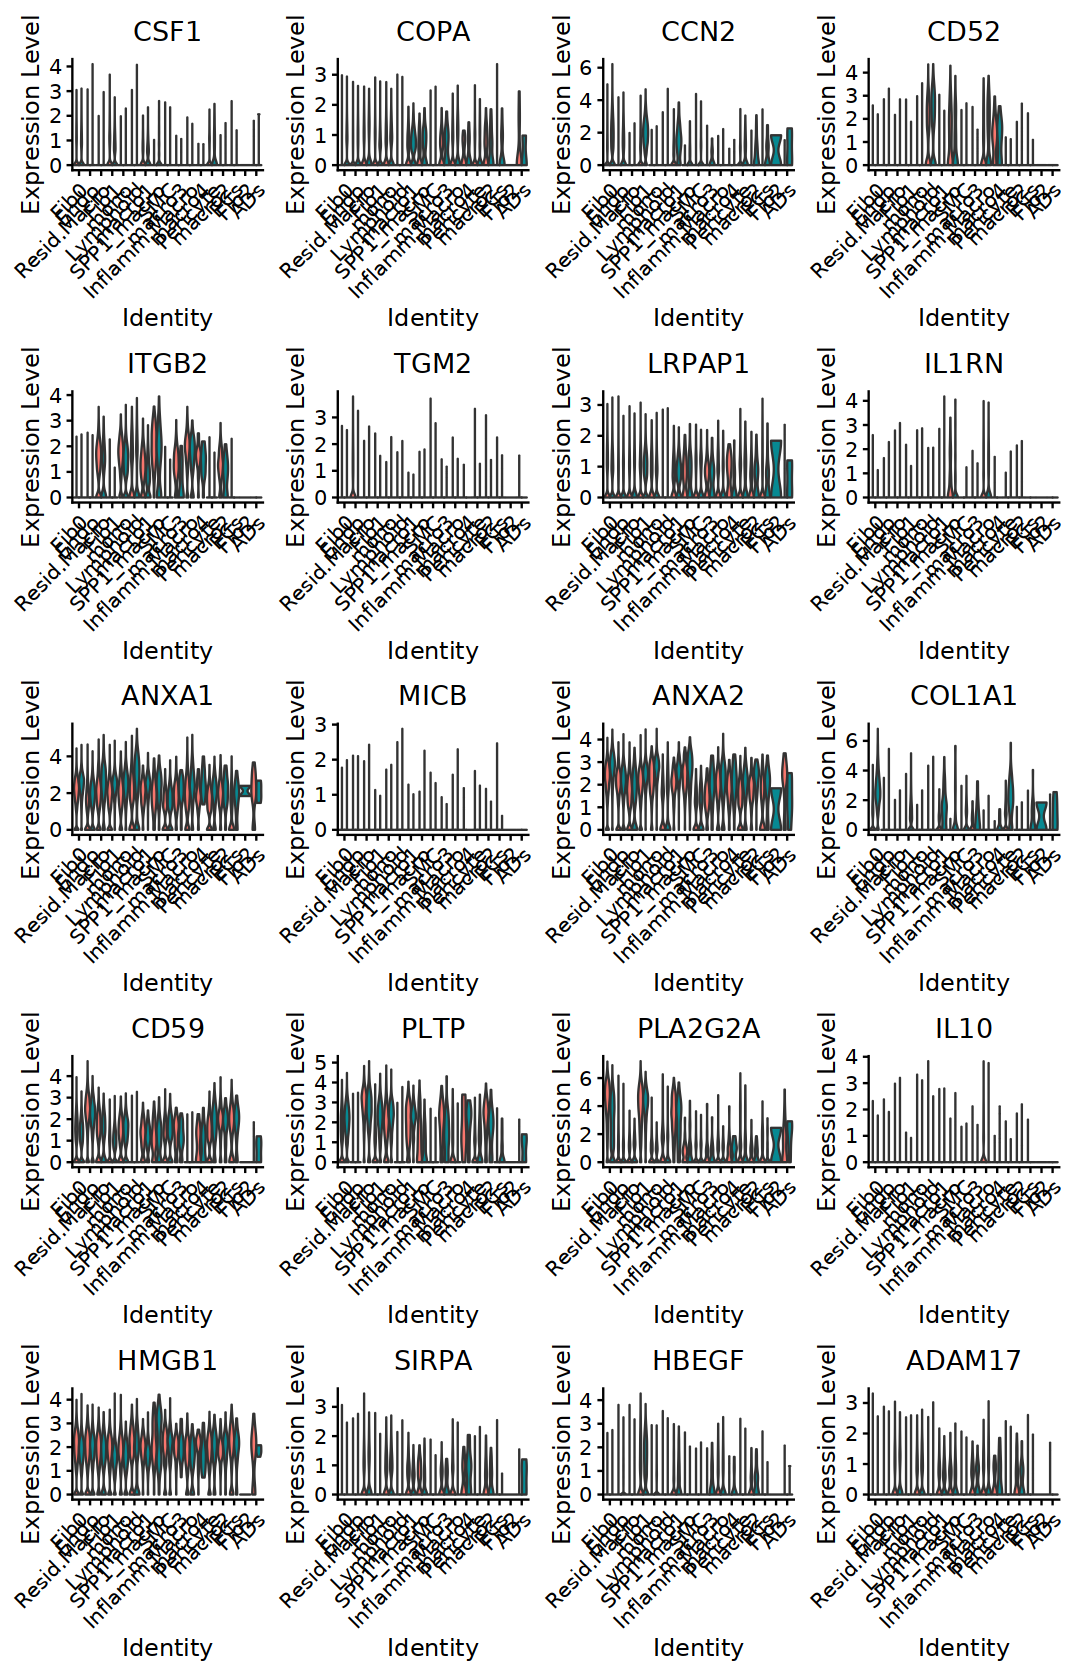

In [49]:
VlnPlot(seuratObj, features = nichenet_output$top_ligands, split.by = "group", pt.size = 0, combine = T)

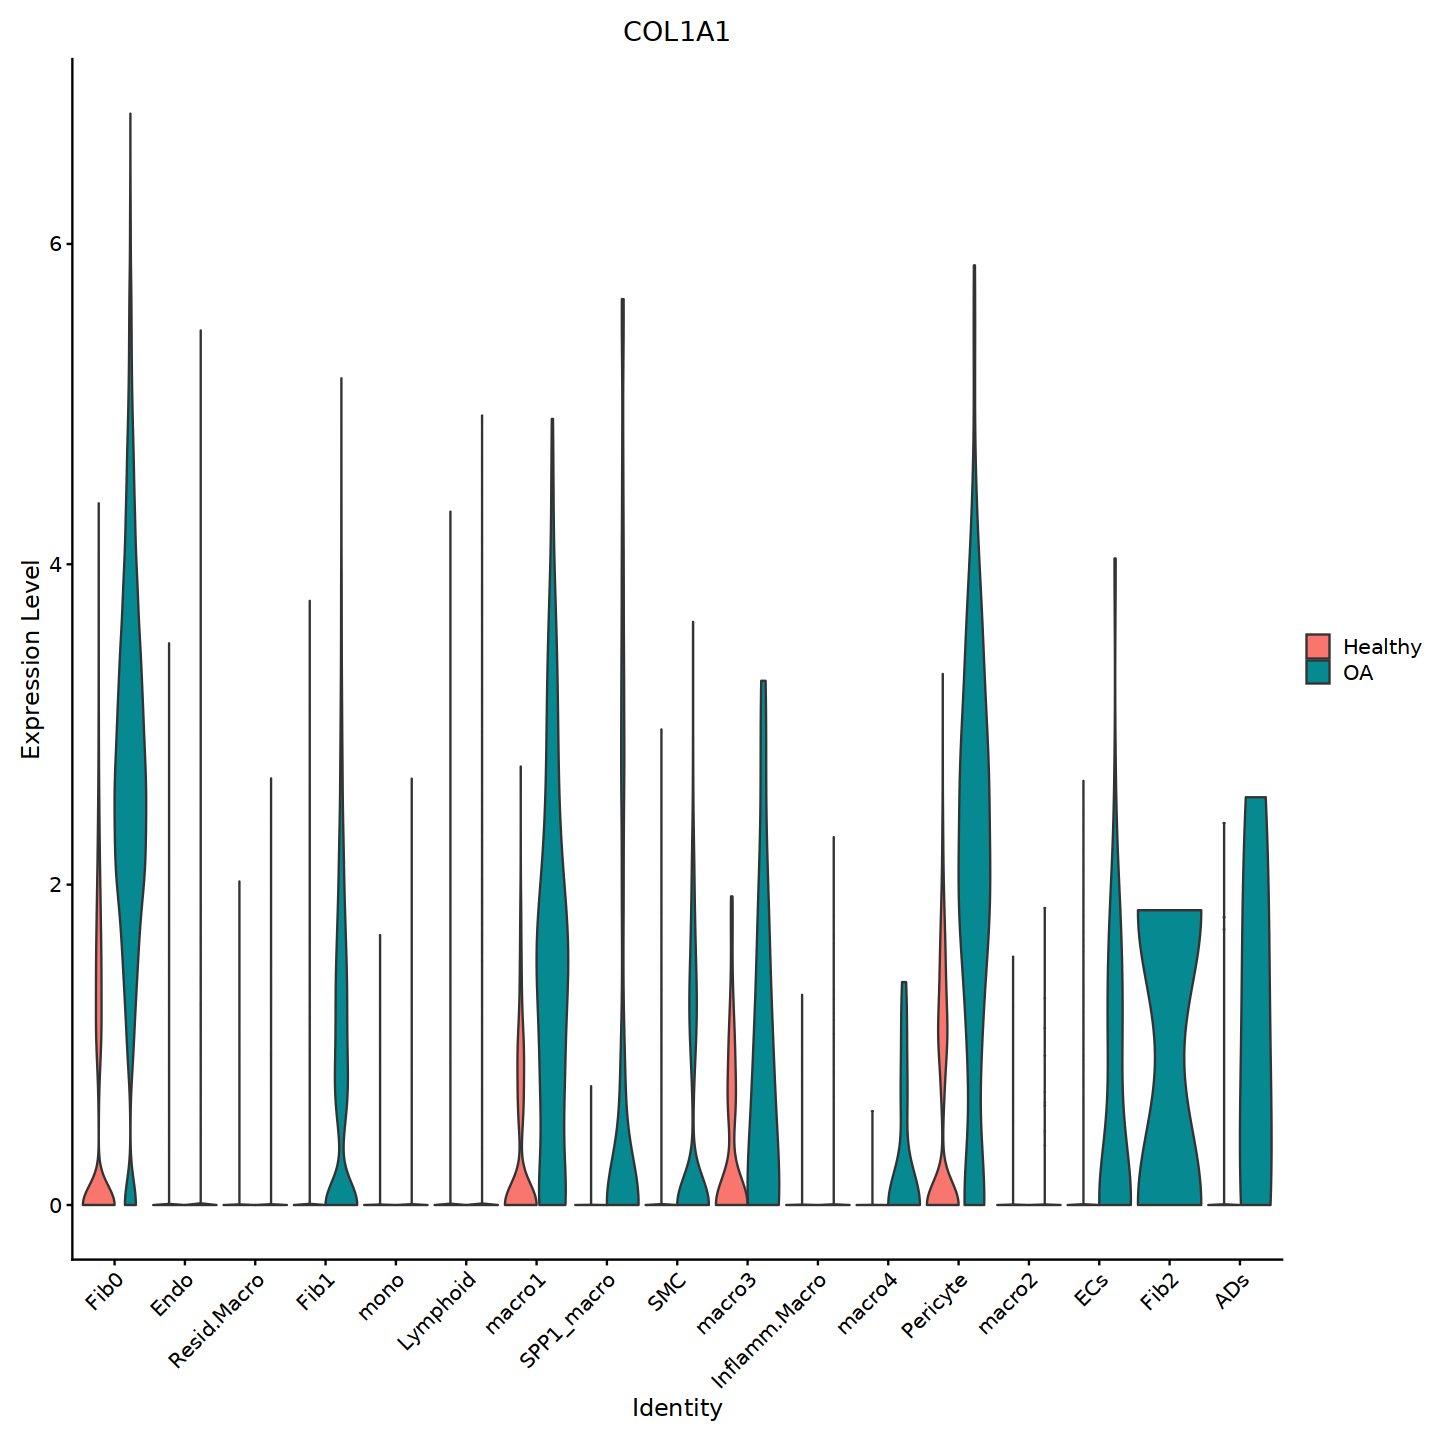

In [59]:
VlnPlot(seuratObj, features = 'COL1A1', split.by = "group", pt.size = 0, combine = T)

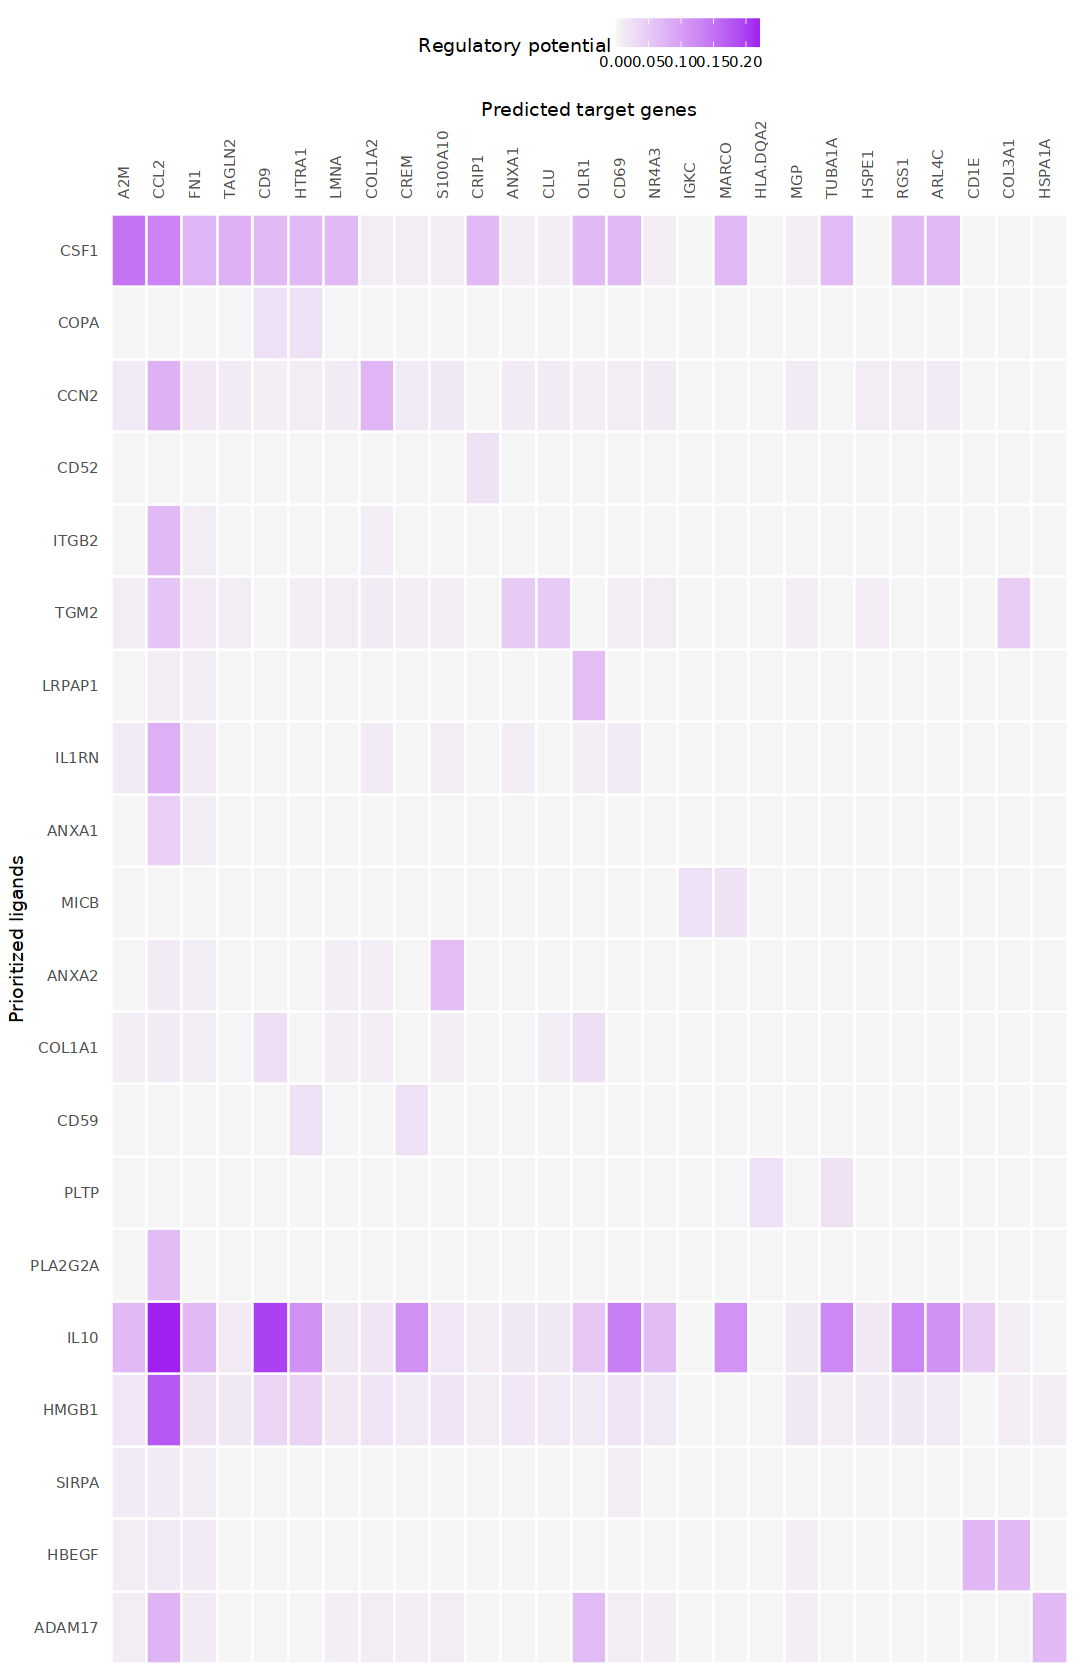

In [50]:
nichenet_output$ligand_target_heatmap

In [51]:
x = nichenet_output$top_targets

In [52]:
x

[1] "A2M"      "CCL2"     "FN1"      "TAGLN2"   "CD9"      "HTRA1"   
 [7] "LMNA"     "COL1A2"   "CREM"     "S100A10"  "CRIP1"    "ANXA1"   
[13] "CLU"      "OLR1"     "CD69"     "NR4A3"    "IGKC"     "MARCO"   
[19] "HLA-DQA2" "MGP"      "TUBA1A"   "HSPE1"    "RGS1"     "ARL4C"   
[25] "CD1E"     "COL3A1"   "HSPA1A"

Warning message:
"Scaling data with a low number of groups may produce misleading results"


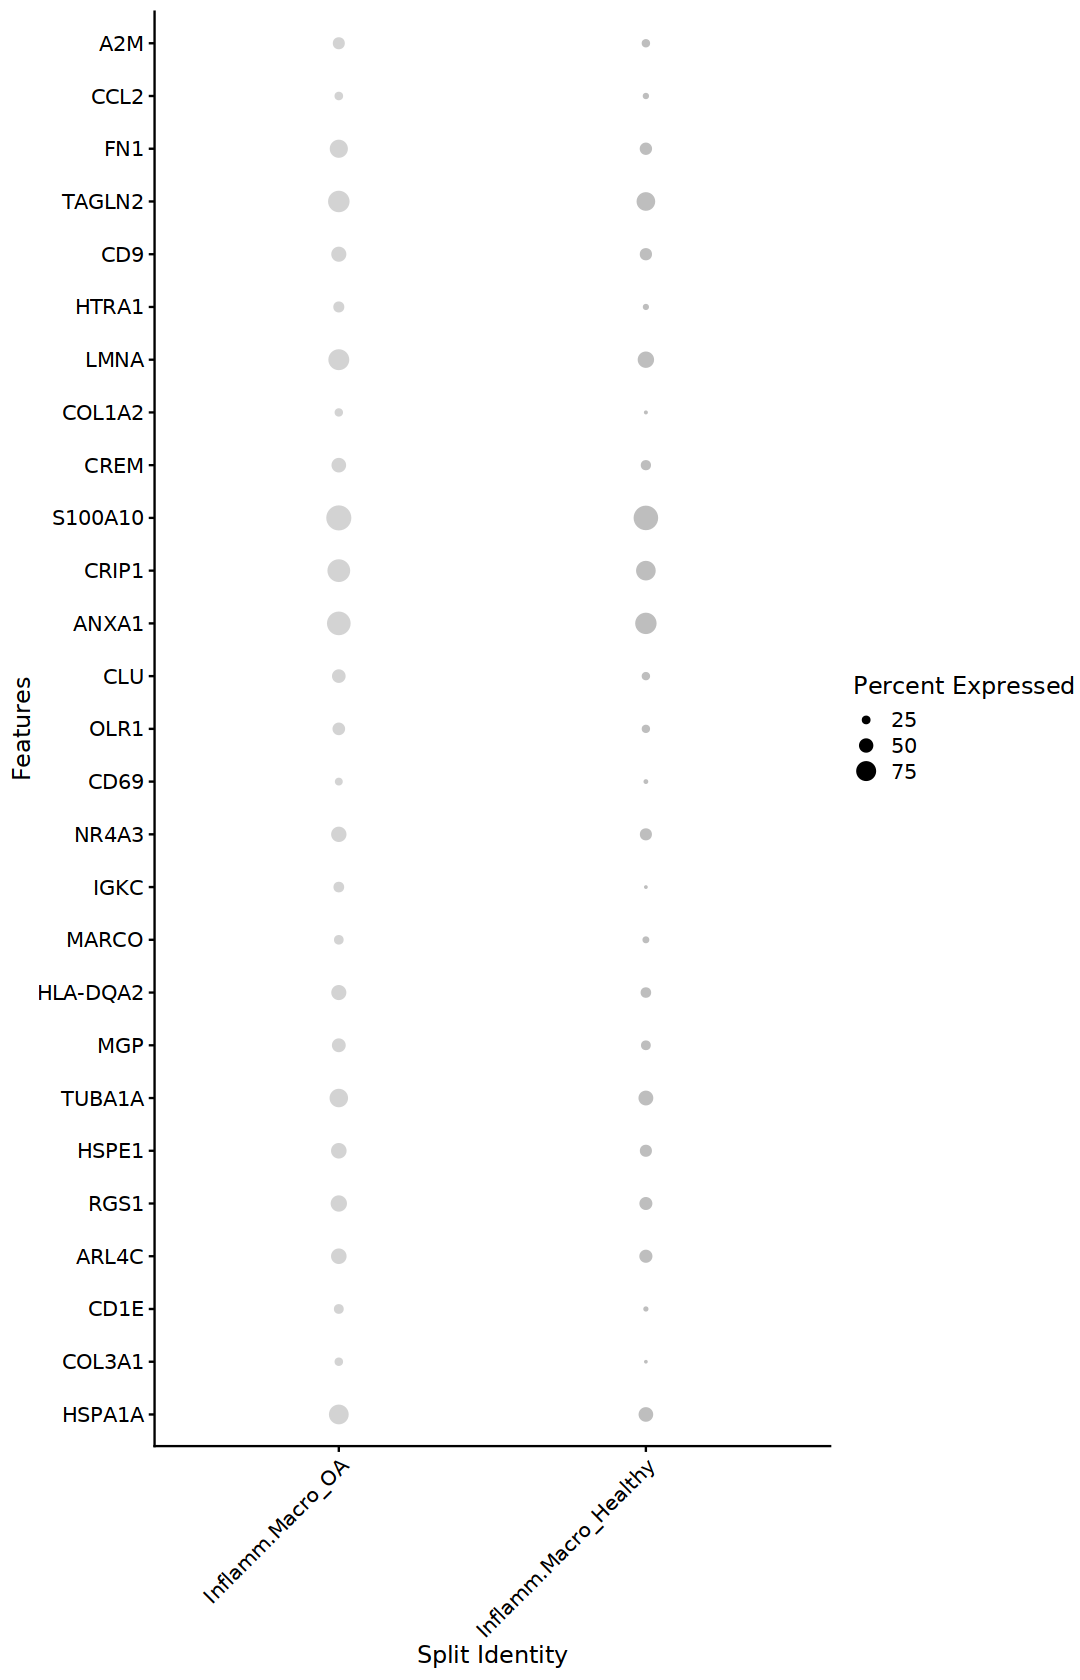

In [53]:
DotPlot(seuratObj %>% subset(idents = "Inflamm.Macro"), features = nichenet_output$top_targets %>% rev(), split.by = "group") +
RotatedAxis()+coord_flip()

In [54]:
options(repr.plot.width = 4,repr.plot.height = 4)

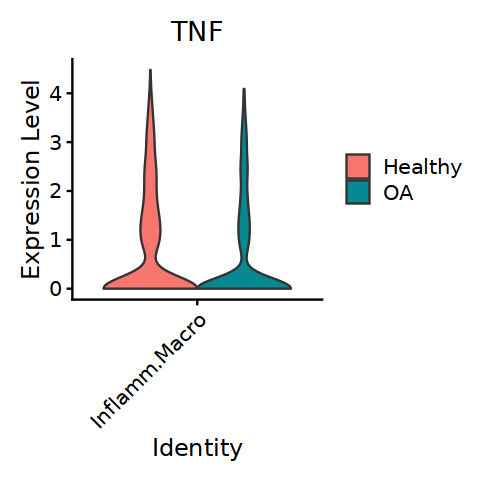

In [55]:
VlnPlot(seuratObj %>% subset(idents = "Inflamm.Macro"), features = c("TNF"),
        split.by = "group",    pt.size = 0, combine = T)

In [56]:
options(repr.plot.width = 12,repr.plot.height = 12)

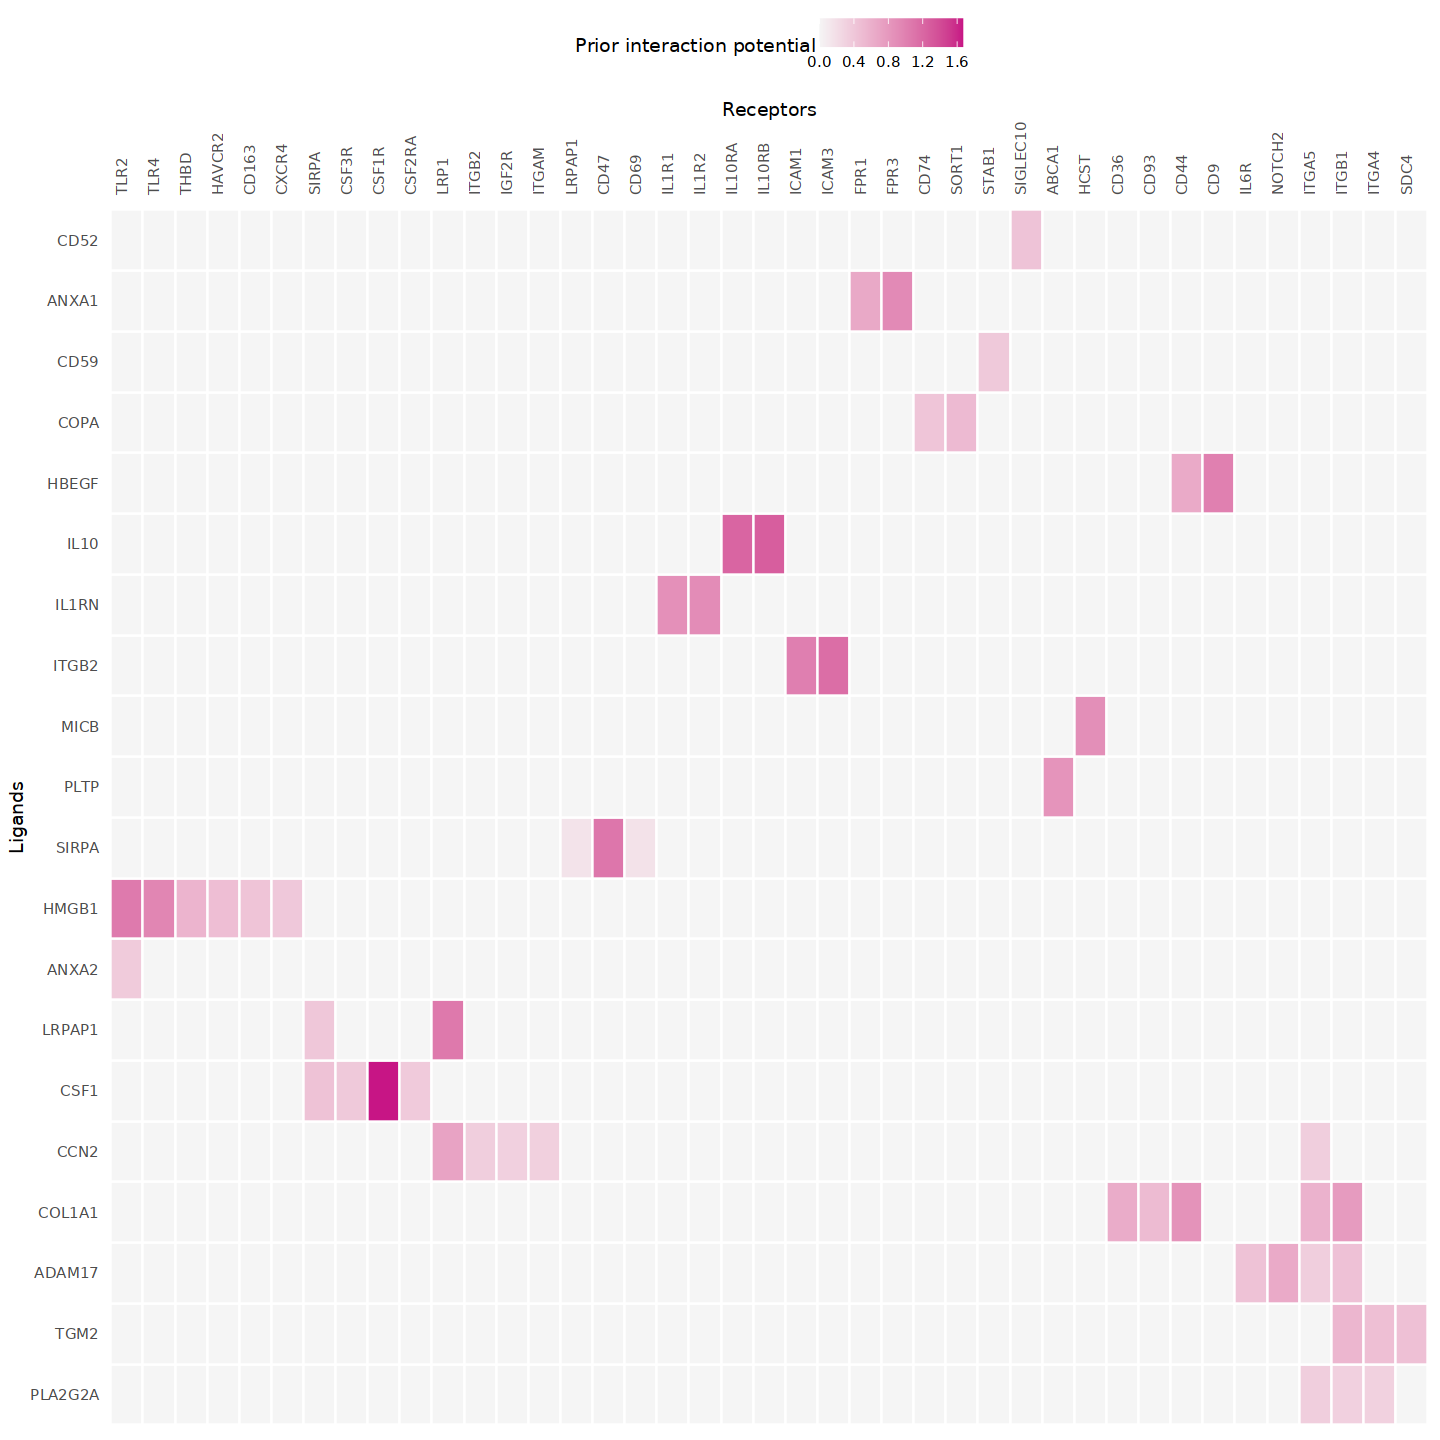

In [57]:
nichenet_output$ligand_receptor_heatmap